# Medical Expense prediction


## Introduction
 To realize their profit, insurance companies must charge a higher premium than the amount paid to the insured. For this reason, insurance companies invest a lot of time, effort, and money in creating models that are able to accurately predict health care costs. In order to fulfill this mission, we will first analyze the factors that influence medical loads and secondly try to build an adequate model and optimize its performance.

## Features

- age : age of primary beneficiary

- sex : insurance contractor gender, female, male

- bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height , objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children : Number of children covered by health insurance / Number of dependents

- smoker : Does smoking (yes/no)

- region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

## Target

- charges : Individual medical costs billed by health insurance

## Importing necessary libraries for Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading Data using Pandas

In [65]:
med= pd.read_csv('insurance.csv')
m=med                 # as backup for futher use

## Exploratory Data Analysis

In [4]:
med.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
med.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
med.sample(5)

,age,sex,bmi,children,smoker,region,charges
853,53,female,23.750,2,no,northeast,11729.67950
1319,39,female,26.315,2,no,northwest,7201.70085
1085,39,female,18.300,5,yes,southwest,19023.26000
1334,18,female,31.920,0,no,northeast,2205.98080
781,18,male,41.140,0,no,southeast,1146.79660


In [7]:
med.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
med.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# We have 7 coloumns and 1338 rows in Dataset
med.shape

(1338, 7)

In [10]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
med.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

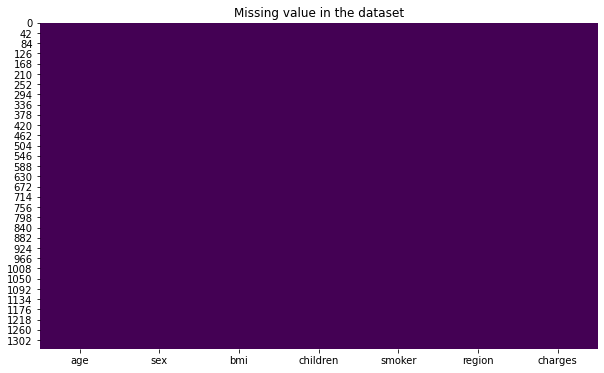

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(med.isnull(),cbar=False,cmap='viridis')
plt.title('Missing value in the dataset');

No missing value in the data set



## Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
med['sex']=le.fit_transform(med['sex'])

In [16]:
med['smoker']=le.fit_transform(med['smoker'])

In [17]:
med['region']=le.fit_transform(med['region'])
#statified sampling

In [18]:
med

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Statistical Analysis

In [19]:
#Finding out the count,max,min,standard deviation,mean ,median and quartiles.
med.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [20]:
#Finding correlation in dataset
med.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


# Visualisation 

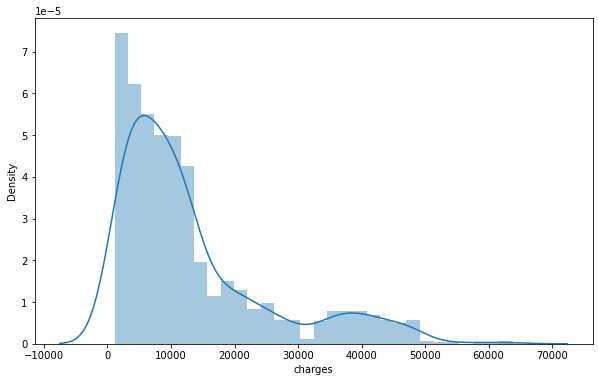

In [21]:
# Dist plot of Density of Charges 
plt.figure(figsize=(10,6))
sns.distplot(m.charges);
plt.show()

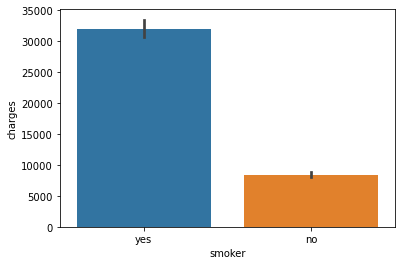

In [66]:
#Bar plot of Charges vs smoker
sns.barplot(x='smoker',y='charges',data=m);

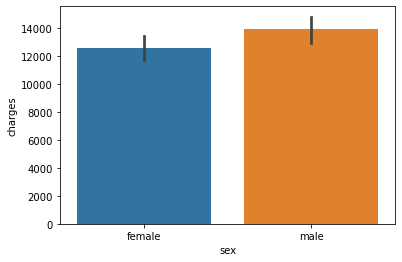

In [67]:
#Bar plot of Charges vs sex
sns.barplot(x='sex',y='charges',data=m);

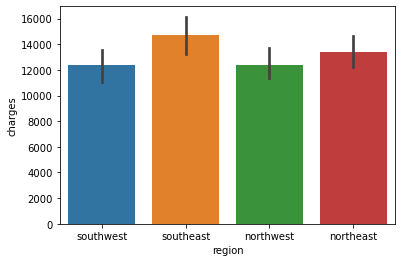

In [68]:
#Bar plot of Charges vs region
sns.barplot(x='region',y='charges',data=m);

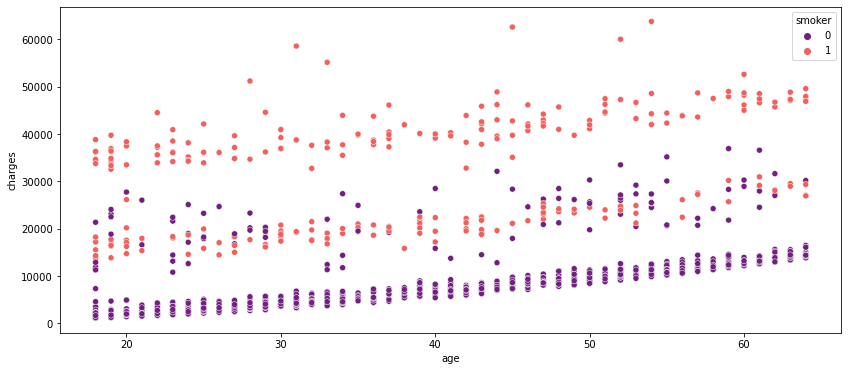

In [25]:
#Scatter plot of Charges vs age

plt.figure(figsize=(14,6))

sns.scatterplot(x='age',y='charges',data=med,palette='magma',hue='smoker')

plt.show()


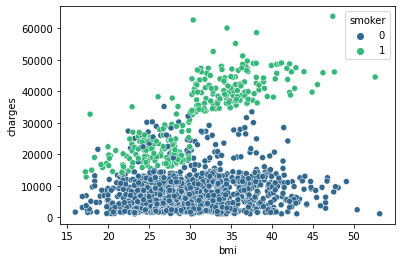

In [26]:
#Scatter plot of Charges vs bmi

sns.scatterplot(x='bmi',y='charges',data=med,palette='viridis',hue='smoker')

plt.show()

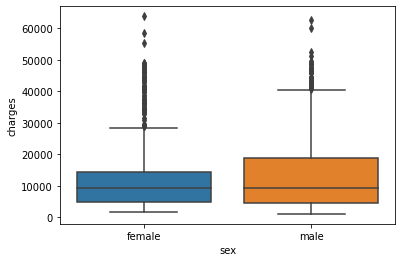

In [69]:
#Violin plot of Charges vs sex
sns.boxplot(x='sex',y='charges',data=m);

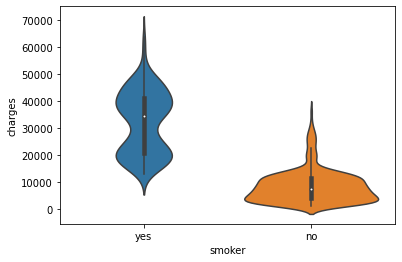

In [70]:
#Violin plot of Charges vs smokre
plt.figsize=(10,10)
sns.violinplot(x='smoker',y='charges',data = m);


## Correlation

In [29]:
corr=med.corr()

In [30]:
med.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

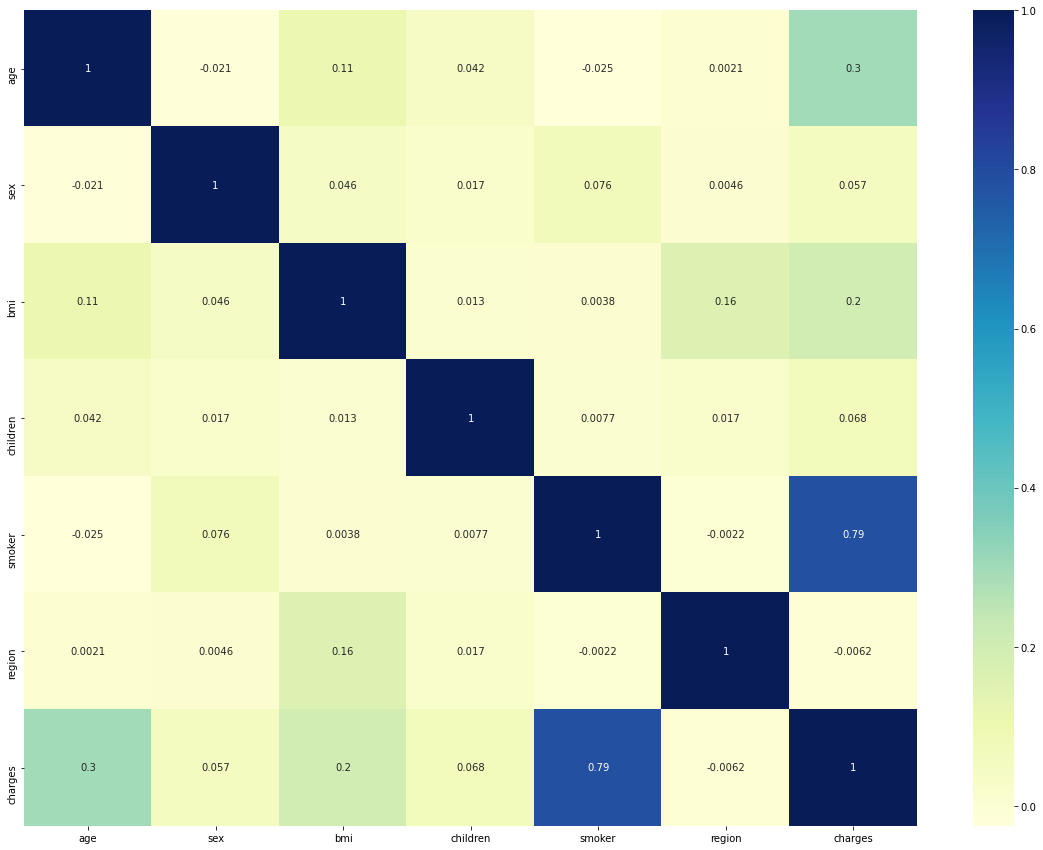

In [31]:
plt.figure(figsize=(20,15))

ax = sns.heatmap(corr, annot=True,cmap="YlGnBu")

## Smokers have positive coorelation with Charges

<Figure size 720x720 with 0 Axes>

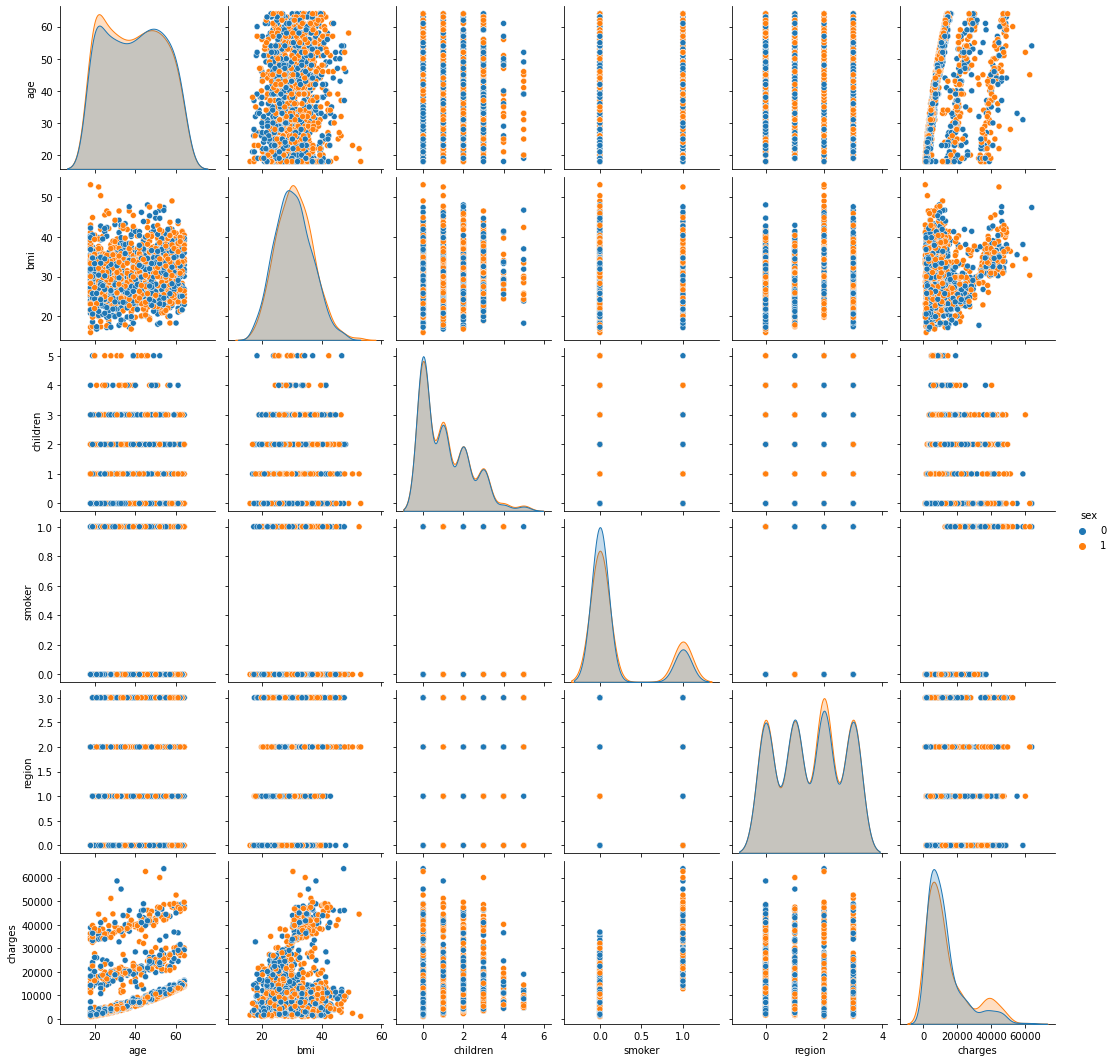

In [32]:
plt.figure(figsize=(10,10))
sns.pairplot(data=m,hue='sex');

[]

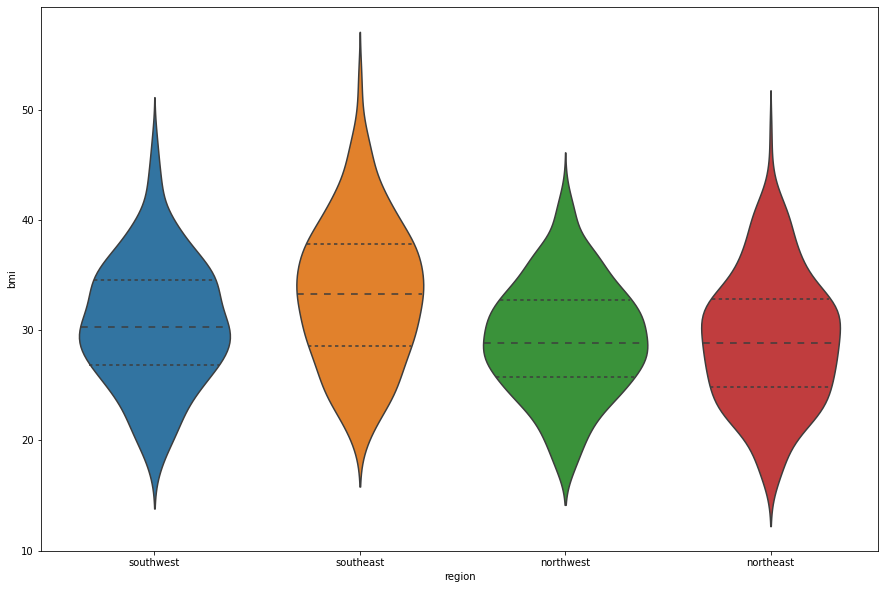

In [71]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x="region", y="bmi", data=m, inner="quartile",)
ax.plot()

 Conclusion : Southeast region has more bmi than other three regions.
 and other three regions have somewhat same median i.e.,, around 30.

## Finding important features

In [34]:

from sklearn.ensemble import ExtraTreesRegressor

In [35]:
X=med[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=med['charges']

In [36]:
imp=ExtraTreesRegressor()

In [37]:
imp.fit(X,y)

ExtraTreesRegressor()

In [38]:
feat=imp.feature_importances_

In [39]:
s=pd.Series(feat,index=X.columns)
s

age         0.129743
sex         0.009816
bmi         0.193346
children    0.024404
smoker      0.620592
region      0.022099
dtype: float64

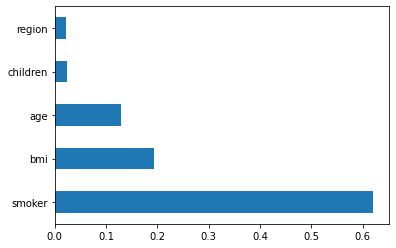

In [40]:
s.nlargest(5).plot(kind="barh")
plt.show()

   ####                 Conclusion: Charges has highest  dependency on Smoker compared to bmi and age. 

In [41]:
med.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Split the data and doing Machine Learning Algorithm

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [46]:
lr=LinearRegression() 

### Fitting Data

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

### Predicting from trained model

In [48]:
pred=lr.predict(X_test)

In [49]:
r2_score(y_test, pred)

0.6882621626245417

## Accuracy for Linear Regression is 76.69%

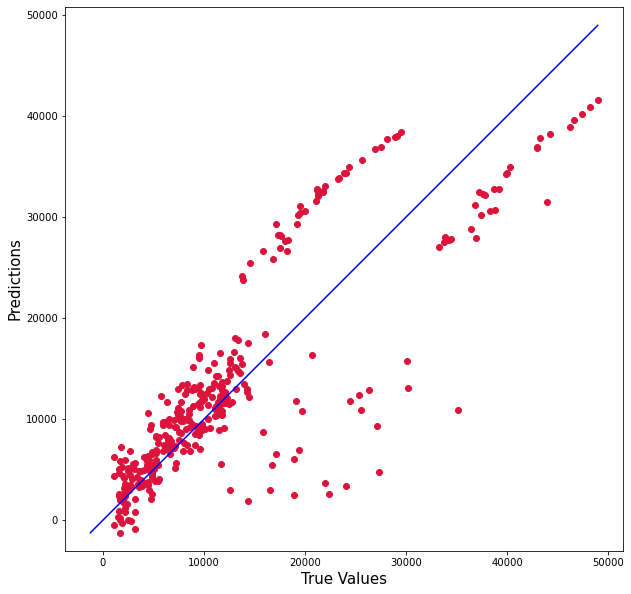

In [50]:
pred = lr.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

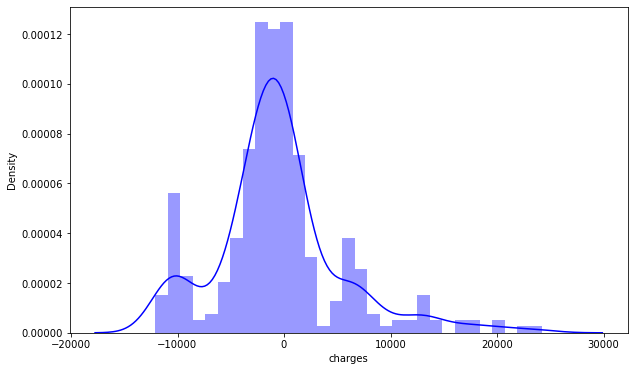

In [51]:
plt.figure(figsize=(10,6))
sns.distplot((y_test - pred),color='b')
plt.show()

In [52]:

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 4164.6536074310625
MSE: 36341669.36946763
RMSE: 6028.405209461921


In [53]:
print(lr.score(X_test, y_test))

0.6882621626245417


# Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor


In [55]:
dtr=DecisionTreeRegressor()

## Fitting data

In [56]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

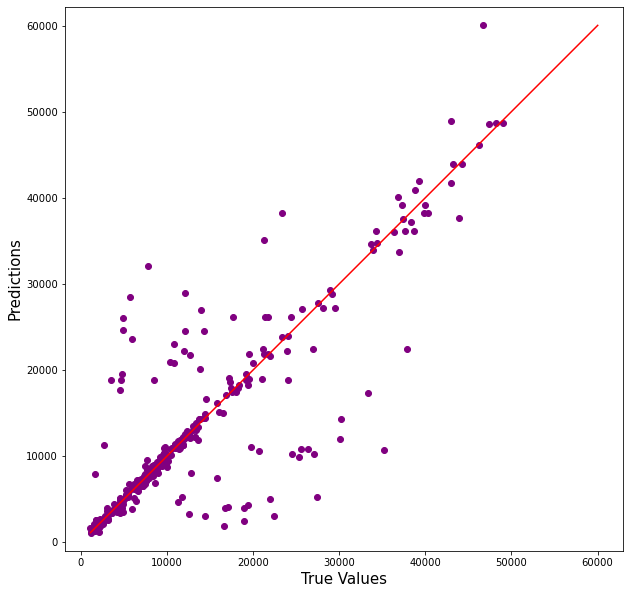

In [57]:
pred = dtr.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='purple')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [58]:
dtr.score(X_test,y_test)

0.7072508370434505

# Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators = 16)
rfreg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=16)

In [60]:
predict = rfreg.predict(X_test)
r2_score(y_test, predict)

0.8308233993155325

## Plot predicted vs actual results of best model - Random Forest Regression

pred = rfreg.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='blue')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'orange')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Conclusion: 

As we run all three Algorithms, we are now able to decide which algorithm is best fit for the prediction of the Insurance Charge amount.

Accuracy of all the algorithms is as follows:

In [61]:
print("Linear Regression = 76.69%")
print("Decision Tree Regression = 72.90%")
print("Random Forest Regression = 82.95%")

Linear Regression = 76.69%
Decision Tree Regression = 72.90%
Random Forest Regression = 82.95%


## Random Forest is giving somewhat better results as compare to Linear regression and Decision Tree. So Random Forest is giving the best accuracy which is 82.95%.